In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [2]:
#read files
import zipfile

customers = pd.read_csv('customers_mod.csv')
    
with zipfile.ZipFile('articles.csv.zip', 'r') as z:
    f = z.open('articles.csv')
    articles = pd.read_csv(f)
    
with zipfile.ZipFile('transactions_train.csv.zip', 'r') as z:
    f = z.open('transactions_train.csv')
    transactions = pd.read_csv(f)

In [3]:
def select_columns(df):
    return (df
            .iloc[:,:-1]
           )

def tweak_data(df):
    return (df
     .assign(age = df.age.astype('Int8'))
           )

In [4]:
def tweak_data_trns(df):
    return (df
     .assign(price = df.price.astype('float32'),
             sales_channel = 'store')
     .assign(sales_channel = lambda df: df.sales_channel.where(df.sales_channel_id == 1, 'online').astype('category')
             )
     .drop(columns=['sales_channel_id'])
           )

In [5]:
def tweak_data_arts(df):
    cols = ['article_id','product_type_name']
    return (df
     [cols]
     .assign(product_type = df.product_type_name.astype('category'),
             )
     )

In [6]:
def merge_dfs(customers, transactions, articles):
    return (
    pd.merge(pd.merge(tweak_data(customers), tweak_data_trns(transactions), on='customer_id'),
            tweak_data_arts(articles), on='article_id')
    )

In [7]:
df = (merge_dfs(customers, transactions, articles)
            .drop(columns=['article_id']))

In [8]:
df.head()

,Unnamed: 0,customer_id,Customer_segment,age,t_dat,price,sales_channel,product_type_name,product_type
0,0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,High value Customer,49,2018-12-27,0.044051,store,Jacket,Jacket
1,10612,0209bfc5582b5c855952e5b43dc9c17bef921ca0f46b42...,Lost Customers,44,2018-10-03,0.061000,store,Jacket,Jacket
2,30006,05d20eff33ec820d4330ee25cce4d0c35e8a305137caf0...,Medium Value Customer,41,2019-12-17,0.033881,online,Jacket,Jacket
3,30816,05fa492d5d182adb9dca7cc20be545d2dc8990606d2197...,Medium Value Customer,41,2018-11-22,0.050831,store,Jacket,Jacket
4,31188,060de711fa176fb5249bb39f0eceea040bde903f8b0434...,Lost Customers,45,2018-09-24,0.067780,online,Jacket,Jacket


In [9]:
df.shape

(31471572, 9)

In [10]:
new_df = df[['customer_id','Customer_segment','age','t_dat','product_type']]
new_df

,customer_id,Customer_segment,age,t_dat,product_type
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,High value Customer,49,2018-12-27,Jacket
1,0209bfc5582b5c855952e5b43dc9c17bef921ca0f46b42...,Lost Customers,44,2018-10-03,Jacket
2,05d20eff33ec820d4330ee25cce4d0c35e8a305137caf0...,Medium Value Customer,41,2019-12-17,Jacket
3,05fa492d5d182adb9dca7cc20be545d2dc8990606d2197...,Medium Value Customer,41,2018-11-22,Jacket
4,060de711fa176fb5249bb39f0eceea040bde903f8b0434...,Lost Customers,45,2018-09-24,Jacket
...,...,...,...,...,...
31471567,ffe6e53e0ac98cd3da1697e057f24f002482ef00d0573b...,Top Customers,22,2018-09-26,Bag
31471568,fff22c025716b0f38fadb92a2bd09881c98e11368589c1...,Low Value Customers,41,2018-11-20,Dress
31471569,fff3e75605ec575be9b95eda1e6557299e81bba12668d7...,Top Customers,33,2018-10-17,Trousers
31471570,fff4381593e170ca0aea188998487c830d9a4070c9ec4b...,High value Customer,27,2019-03-18,Vest top


In [11]:
test = new_df[new_df['Customer_segment']=='Top Customers'].groupby(by=['customer_id','t_dat'], as_index=False)['product_type'].apply(lambda x: ','.join(x.astype(str))) 
test = pd.DataFrame(test)
test

0
customer_id                                        t_dat                                                        
00009d946eec3ea54add5ba56d5210ea898def4b46c6857... 2018-10-10     Trousers,Sweater,Hoodie,Trousers,Hoodie,Blouse
                                                   2018-11-19  Trousers,T-shirt,Jacket,Jacket,Sweater,Sweater...
                                                   2018-11-22  Trousers,T-shirt,Sweater,Cardigan,Top,Trousers...
                                                   2018-11-26                                        Sweater,Top
                                                   2018-12-09                                  Trousers,Trousers
...                                                                                                          ...
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a17... 2020-01-22                                           Trousers
                                                   2020-07-03                   Polo shirt,Polo shirt,Polo shirt
                                                   2020-07-16                           Trousers,T-shirt,Sweater
                                                   2020-09-08                                Sweater,Shirt,Dress
                                                   2020-09-09                                              Shirt

[3382305 rows x 1 columns]

In [12]:
test = test.reset_index().drop(columns='t_dat')
test

,customer_id,0
0,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,"Trousers,Sweater,Hoodie,Trousers,Hoodie,Blouse"
1,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,"Trousers,T-shirt,Jacket,Jacket,Sweater,Sweater..."
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,"Trousers,T-shirt,Sweater,Cardigan,Top,Trousers..."
3,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,"Sweater,Top"
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,"Trousers,Trousers"
...,...,...
3382300,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Trousers
3382301,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,"Polo shirt,Polo shirt,Polo shirt"
3382302,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,"Trousers,T-shirt,Sweater"
3382303,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,"Sweater,Shirt,Dress"


In [13]:
df_item_sets = customers.drop(columns='Unnamed: 0').merge(test.rename(columns={0:'items'}))
df_item_sets

,customer_id,Customer_segment,age,items
0,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,Top Customers,56,"Trousers,Sweater,Hoodie,Trousers,Hoodie,Blouse"
1,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,Top Customers,56,"Trousers,T-shirt,Jacket,Jacket,Sweater,Sweater..."
2,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,Top Customers,56,"Trousers,T-shirt,Sweater,Cardigan,Top,Trousers..."
3,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,Top Customers,56,"Sweater,Top"
4,00009d946eec3ea54add5ba56d5210ea898def4b46c685...,Top Customers,56,"Trousers,Trousers"
...,...,...,...,...
3382300,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Top Customers,21,Trousers
3382301,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Top Customers,21,"Polo shirt,Polo shirt,Polo shirt"
3382302,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Top Customers,21,"Trousers,T-shirt,Sweater"
3382303,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,Top Customers,21,"Sweater,Shirt,Dress"


In [14]:
#filter by age
age20_30=df_item_sets[(df_item_sets.age>=20) & (df_item_sets.age<30)]
age30_40=df_item_sets[(df_item_sets.age>=30) & (df_item_sets.age<40)]
age40_50=df_item_sets[(df_item_sets.age>=40) & (df_item_sets.age<50)]
age50_60=df_item_sets[(df_item_sets.age>=50) & (df_item_sets.age<60)]
age60_70=df_item_sets[(df_item_sets.age>=60) & (df_item_sets.age<70)]
# Only the baskets
items_20_30 = age20_30['items'].values.tolist()
items_30_40 = age30_40['items'].values.tolist()
items_40_50 = age40_50['items'].values.tolist()
items_50_60 = age50_60['items'].values.tolist()
items_60_70 = age60_70['items'].values.tolist()

purchaseslist20_30 = [] 
purchaseslist30_40 = [] 
purchaseslist40_50 = []
purchaseslist50_60 = []
purchaseslist60_70 = []

for i in items_20_30:
    #print(i)
    purchaseslist20_30.append(i.split(",")) 


for i in items_30_40:
    #print(i)
    purchaseslist30_40.append(i.split(",")) 

for i in items_40_50:
    #print(i)
    purchaseslist40_50.append(i.split(",")) 

for i in items_50_60:
    #print(i)
    purchaseslist50_60.append(i.split(","))
    
for i in items_60_70:
    #print(i)
    purchaseslist60_70.append(i.split(","))

In [15]:
#Sparse=True go in fit 
te = TransactionEncoder()
te_ary = te.fit(purchaseslist20_30).transform(purchaseslist20_30)
df20_30 = pd.DataFrame(te_ary,columns=te.columns_)


te_ary = te.fit(purchaseslist30_40).transform(purchaseslist30_40)
df30_40 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist40_50).transform(purchaseslist40_50)
df40_50 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist50_60).transform(purchaseslist50_60)
df50_60 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist60_70).transform(purchaseslist60_70)
df60_70 = pd.DataFrame(te_ary,columns=te.columns_)

In [16]:
def freqitm(df,minsup):
    frequent_itemsets = fpgrowth(df, min_support=minsup,use_colnames=True)
    frequent_itemsets= frequent_itemsets.sort_values(by=['support'],ascending=False)
    return frequent_itemsets

In [17]:
def apo_rules(frequent_itemsets):
    apriori_rules=association_rules(frequent_itemsets, metric ="lift", min_threshold = 1)
    apriori_rules=apriori_rules.sort_values(['confidence', 'lift'], ascending =[False, False])
    return apriori_rules

In [18]:
interesting_items = ['Dress', 'Blouse', 'Skirt', 'Bra', 'Vest top', 'Underwear bottom', 'Bikini top']

In [19]:
table = pd.DataFrame(index=['20-30', '30-40', '40-50', '50-60', '60-70'], columns=['Top customers', 'High value customers', 'Lost customers'])
table

,Top customers,High value customers,Lost customers
20-30,NaN,NaN,NaN
30-40,NaN,NaN,NaN
40-50,NaN,NaN,NaN
50-60,NaN,NaN,NaN
60-70,NaN,NaN,NaN


In [20]:
dic = {}
for item in interesting_items:
    dic[item] = table.copy()

In [21]:
def add_support(df,age_range):
    for item in interesting_items:
        for index, row in df.iterrows():
            try:
                x, = row['itemsets']
                if x==item:
                    dic[item].loc[age_range, segment] = row['support']    
            except ValueError:
                pass

In [22]:
minsup = 0.025

# Top Customers

## Age group 20-30

In [23]:
segment = 'Top customers'

In [24]:
# age 20-30
freq20_30=freqitm(df20_30,minsup)
freq20_30

,support,itemsets
1,0.238266,(Trousers)
3,0.204613,(Dress)
8,0.189315,(Sweater)
4,0.132724,(T-shirt)
7,0.126052,(Top)
10,0.111841,(Blouse)
12,0.098853,(Bra)
6,0.092834,(Vest top)
19,0.081389,(Skirt)
11,0.069583,(Underwear bottom)


In [25]:
add_support(freq20_30, '20-30')

In [26]:
apo_rules(freq20_30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Swimwear bottom),(Bikini top),0.067477,0.068388,0.052140,0.772714,11.299056,0.047526,4.098861
2,(Bikini top),(Swimwear bottom),0.068388,0.067477,0.052140,0.762426,11.299056,0.047526,3.925196
17,(Underwear bottom),(Bra),0.069583,0.098853,0.030450,0.437611,4.426904,0.023572,1.602356
22,(Skirt),(Dress),0.081389,0.204613,0.026628,0.327173,1.598987,0.009975,1.182157
8,(Blouse),(Trousers),0.111841,0.238266,0.034990,0.312850,1.313031,0.008342,1.108542
16,(Bra),(Underwear bottom),0.098853,0.069583,0.030450,0.308037,4.426904,0.023572,1.344606
5,(Top),(Trousers),0.126052,0.238266,0.038248,0.303432,1.273501,0.008214,1.093553
0,(Sweater),(Trousers),0.189315,0.238266,0.054104,0.285786,1.199441,0.008996,1.066535
6,(T-shirt),(Trousers),0.132724,0.238266,0.037052,0.279166,1.171656,0.005428,1.056739
12,(Blouse),(Dress),0.111841,0.204613,0.030611,0.273700,1.337651,0.007727,1.095123


## Age group 30-40

In [27]:
# age 30-40
freq30_40=freqitm(df30_40,minsup)
freq30_40

,support,itemsets
4,0.259345,(Trousers)
5,0.238473,(Dress)
1,0.194331,(Sweater)
17,0.141170,(T-shirt)
9,0.135108,(Top)
18,0.114688,(Blouse)
11,0.104492,(Vest top)
8,0.092431,(Bra)
10,0.085686,(Skirt)
2,0.070675,(Underwear bottom)


In [28]:
add_support(freq30_40, '30-40')

In [29]:
apo_rules(freq30_40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(Bikini top),(Swimwear bottom),0.056208,0.056338,0.042433,0.754934,13.399968,0.039267,3.850639
7,(Swimwear bottom),(Bikini top),0.056338,0.056208,0.042433,0.753185,13.399968,0.039267,3.823885
25,(Underwear bottom),(Bra),0.070675,0.092431,0.029341,0.415156,4.491533,0.022809,1.551813
22,(Skirt),(Dress),0.085686,0.238473,0.029776,0.347503,1.457201,0.009342,1.167096
8,(Blouse),(Trousers),0.114688,0.259345,0.038490,0.335604,1.294047,0.008746,1.114780
3,(Top),(Trousers),0.135108,0.259345,0.044844,0.331913,1.279815,0.009805,1.108622
0,(Sweater),(Trousers),0.194331,0.259345,0.061900,0.318528,1.228202,0.011501,1.086846
24,(Bra),(Underwear bottom),0.092431,0.070675,0.029341,0.317440,4.491533,0.022809,1.361529
4,(T-shirt),(Trousers),0.141170,0.259345,0.044757,0.317045,1.222485,0.008146,1.084486
14,(Blouse),(Dress),0.114688,0.238473,0.035361,0.308324,1.292911,0.008011,1.100989


## Age group 40-50

In [30]:
# age 40-50
freq40_50=freqitm(df40_50,minsup)
freq40_50

,support,itemsets
0,0.275018,(Trousers)
5,0.220168,(Dress)
1,0.191182,(Sweater)
10,0.136155,(T-shirt)
2,0.121104,(Top)
6,0.116280,(Blouse)
13,0.084448,(Vest top)
3,0.073937,(Skirt)
14,0.072353,(Shorts)
15,0.070736,(Bra)


In [31]:
add_support(freq40_50, '40-50')

In [32]:
apo_rules(freq40_50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(Bikini top),(Swimwear bottom),0.046049,0.047469,0.034943,0.758830,15.985820,0.032757,3.949631
8,(Swimwear bottom),(Bikini top),0.047469,0.046049,0.034943,0.736127,15.985820,0.032757,3.615195
6,(Blouse),(Trousers),0.116280,0.275018,0.036953,0.317793,1.155536,0.004974,1.062701
5,(Top),(Trousers),0.121104,0.275018,0.038080,0.314442,1.143352,0.004774,1.057507
2,(T-shirt),(Trousers),0.136155,0.275018,0.042634,0.313126,1.138565,0.005189,1.055480
0,(Sweater),(Trousers),0.191182,0.275018,0.059669,0.312104,1.134851,0.007090,1.053913
10,(Blouse),(Dress),0.116280,0.220168,0.030484,0.262158,1.190719,0.004883,1.056910
13,(Top),(Sweater),0.121104,0.191182,0.028986,0.239349,1.251944,0.005833,1.063324
14,(Top),(Dress),0.121104,0.220168,0.028632,0.236429,1.073856,0.001969,1.021296
19,(Top),(T-shirt),0.121104,0.136155,0.027166,0.224321,1.647542,0.010677,1.113663


## Age group 50-60

In [33]:
# age above 50-60
freq50_60=freqitm(df50_60,minsup)
freq50_60

,support,itemsets
0,0.266025,(Trousers)
13,0.218986,(Dress)
1,0.189640,(Sweater)
2,0.133043,(Blouse)
7,0.120775,(Top)
4,0.114670,(T-shirt)
9,0.069229,(Vest top)
11,0.066631,(Shirt)
14,0.064820,(Skirt)
15,0.060498,(Bra)


In [34]:
add_support(freq50_60, '50-60')

In [35]:
apo_rules(freq50_60)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(Bikini top),(Swimwear bottom),0.040699,0.041748,0.030619,0.752328,18.020600,0.028920,3.869036
11,(Swimwear bottom),(Bikini top),0.041748,0.040699,0.030619,0.733413,18.020600,0.028920,3.598456
5,(Top),(Trousers),0.120775,0.266025,0.034774,0.287921,1.082307,0.002644,1.030749
2,(Blouse),(Trousers),0.133043,0.266025,0.038105,0.286411,1.076632,0.002712,1.028568
6,(T-shirt),(Trousers),0.114670,0.266025,0.032666,0.284873,1.070851,0.002161,1.026356
0,(Sweater),(Trousers),0.189640,0.266025,0.053513,0.282179,1.060725,0.003063,1.022505
8,(Blouse),(Dress),0.133043,0.218986,0.031366,0.235757,1.076582,0.002231,1.021944
13,(Top),(Sweater),0.120775,0.189640,0.026982,0.223405,1.178044,0.004078,1.043477
1,(Trousers),(Sweater),0.266025,0.189640,0.053513,0.201156,1.060725,0.003063,1.014416
3,(Trousers),(Blouse),0.266025,0.133043,0.038105,0.143238,1.076632,0.002712,1.011900


## Age group 60-70

In [36]:
# age group 60-70
freq60_70=freqitm(df60_70,minsup)
freq60_70

,support,itemsets
3,0.264933,(Trousers)
7,0.212173,(Dress)
0,0.194058,(Sweater)
1,0.129026,(Blouse)
4,0.117787,(Top)
8,0.102344,(T-shirt)
6,0.065147,(Shirt)
9,0.059078,(Skirt)
13,0.056101,(Vest top)
14,0.053953,(Jacket)


In [37]:
add_support(freq60_70, '60-70')

In [38]:
apo_rules(freq60_70)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Top),(Trousers),0.117787,0.264933,0.031612,0.268381,1.013012,0.000406,1.004712
0,(Trousers),(Top),0.264933,0.117787,0.031612,0.119319,1.013012,0.000406,1.001740


# High Value Customers

In [39]:
segment = 'High value customers'

In [40]:
test_2 = new_df[new_df['Customer_segment']=='High value Customer'].groupby(by=['customer_id','t_dat'], as_index=False)['product_type'].apply(lambda x: ','.join(x.astype(str))) 
test_2 = pd.DataFrame(test_2)
test_2 = test_2.reset_index().drop(columns='t_dat')
test_2

,customer_id,0
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,"Jacket,Hoodie,Jacket"
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Jumpsuit/Playsuit
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,"Blazer,Blazer"
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,"Shirt,Skirt"
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,Trousers
...,...,...
2024520,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,"Trousers,Top,Blouse"
2024521,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,"Swimwear bottom,Bikini top,Swimwear bottom,Bik..."
2024522,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,"Leggings/Tights,T-shirt,T-shirt"
2024523,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,"Hair/alice band,Vest top,T-shirt,Hair/alice band"


In [41]:
df_item_sets_2 = customers.drop(columns='Unnamed: 0').merge(test_2.rename(columns={0:'items'}))
df_item_sets_2

,customer_id,Customer_segment,age,items
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,High value Customer,49,"Jacket,Hoodie,Jacket"
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,High value Customer,49,Jumpsuit/Playsuit
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,High value Customer,49,"Blazer,Blazer"
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,High value Customer,49,"Shirt,Skirt"
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,High value Customer,49,Trousers
...,...,...,...,...
2024520,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,High value Customer,21,"Trousers,Top,Blouse"
2024521,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,High value Customer,21,"Swimwear bottom,Bikini top,Swimwear bottom,Bik..."
2024522,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,High value Customer,21,"Leggings/Tights,T-shirt,T-shirt"
2024523,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,High value Customer,21,"Hair/alice band,Vest top,T-shirt,Hair/alice band"


In [42]:
#filter by age
age20_30=df_item_sets_2[(df_item_sets_2.age>=20) & (df_item_sets_2.age<30)]
age30_40=df_item_sets_2[(df_item_sets_2.age>=30) & (df_item_sets_2.age<40)]
age40_50=df_item_sets_2[(df_item_sets_2.age>=40) & (df_item_sets_2.age<50)]
age50_60=df_item_sets_2[(df_item_sets_2.age>=50) & (df_item_sets_2.age<60)]
age60_70=df_item_sets_2[(df_item_sets_2.age>=60) & (df_item_sets_2.age<70)]
# Only the baskets
items_20_30 = age20_30['items'].values.tolist()
items_30_40 = age30_40['items'].values.tolist()
items_40_50 = age40_50['items'].values.tolist()
items_50_60 = age50_60['items'].values.tolist()
items_60_70 = age60_70['items'].values.tolist()

purchaseslist20_30 = [] 
purchaseslist30_40 = [] 
purchaseslist40_50 = []
purchaseslist50_60 = []
purchaseslist60_70 = []

for i in items_20_30:
    #print(i)
    purchaseslist20_30.append(i.split(",")) 

for i in items_30_40:
    #print(i)
    purchaseslist30_40.append(i.split(",")) 

for i in items_40_50:
    #print(i)
    purchaseslist40_50.append(i.split(",")) 

for i in items_50_60:
    #print(i)
    purchaseslist50_60.append(i.split(","))
    
for i in items_60_70:
    #print(i)
    purchaseslist60_70.append(i.split(","))

In [43]:
#Sparse=True go in fit 
te = TransactionEncoder()
te_ary = te.fit(purchaseslist20_30).transform(purchaseslist20_30)
df20_30 = pd.DataFrame(te_ary,columns=te.columns_)


te_ary = te.fit(purchaseslist30_40).transform(purchaseslist30_40)
df30_40 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist40_50).transform(purchaseslist40_50)
df40_50 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist50_60).transform(purchaseslist50_60)
df50_60 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist60_70).transform(purchaseslist60_70)
df60_70 = pd.DataFrame(te_ary,columns=te.columns_)

## Age group 20-30

In [44]:
# age 20-30
freq20_30=freqitm(df20_30,minsup)
freq20_30

,support,itemsets
7,0.232167,(Trousers)
3,0.185200,(Sweater)
0,0.179891,(Dress)
11,0.143355,(T-shirt)
13,0.120899,(Top)
4,0.108264,(Bra)
17,0.103641,(Blouse)
12,0.099009,(Vest top)
5,0.079357,(Underwear bottom)
8,0.077440,(Bikini top)


In [45]:
add_support(freq20_30, '20-30')

In [46]:
apo_rules(freq20_30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Swimwear bottom),(Bikini top),0.075974,0.077440,0.060548,0.796950,10.291227,0.054664,4.543507
0,(Bikini top),(Swimwear bottom),0.077440,0.075974,0.060548,0.781867,10.291227,0.054664,4.236073
9,(Underwear bottom),(Bra),0.079357,0.108264,0.035225,0.443885,4.100017,0.026634,1.603509
8,(Bra),(Underwear bottom),0.108264,0.079357,0.035225,0.325366,4.100017,0.026634,1.364655
10,(Blouse),(Trousers),0.103641,0.232167,0.032932,0.317753,1.368639,0.008870,1.125447
7,(Top),(Trousers),0.120899,0.232167,0.036528,0.302138,1.301378,0.008459,1.100264
2,(Sweater),(Trousers),0.185200,0.232167,0.051951,0.280516,1.208247,0.008954,1.067198
4,(T-shirt),(Trousers),0.143355,0.232167,0.039505,0.275572,1.186952,0.006222,1.059915
20,(Blouse),(Dress),0.103641,0.179891,0.026750,0.258102,1.434764,0.008106,1.105419
13,(Top),(Sweater),0.120899,0.185200,0.031065,0.256948,1.387408,0.008674,1.096558


## Age group 30-40

In [47]:
# age 30-40
freq30_40=freqitm(df30_40,minsup)
freq30_40

,support,itemsets
3,0.270484,(Trousers)
4,0.215186,(Dress)
0,0.193536,(Sweater)
14,0.158917,(T-shirt)
7,0.138878,(Top)
8,0.117089,(Vest top)
9,0.111722,(Blouse)
1,0.107806,(Bra)
2,0.087312,(Underwear bottom)
11,0.079031,(Shorts)


In [48]:
add_support(freq30_40, '30-40')

In [49]:
apo_rules(freq30_40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Bikini top),(Swimwear bottom),0.065435,0.065757,0.051277,0.783641,11.917230,0.046975,4.318026
5,(Swimwear bottom),(Bikini top),0.065757,0.065435,0.051277,0.779800,11.917230,0.046975,4.244175
17,(Underwear bottom),(Bra),0.087312,0.107806,0.037529,0.429819,3.986963,0.028116,1.564756
8,(Blouse),(Trousers),0.111722,0.270484,0.040671,0.364034,1.345865,0.010452,1.147100
32,(Skirt),(Dress),0.078838,0.215186,0.028004,0.355208,1.650701,0.011039,1.217159
7,(Top),(Trousers),0.138878,0.270484,0.049030,0.353045,1.305235,0.011466,1.127615
16,(Bra),(Underwear bottom),0.107806,0.087312,0.037529,0.348112,3.986963,0.028116,1.400067
0,(Sweater),(Trousers),0.193536,0.270484,0.064612,0.333849,1.234266,0.012263,1.095121
2,(T-shirt),(Trousers),0.158917,0.270484,0.052313,0.329187,1.217031,0.009329,1.087511
24,(Blouse),(Dress),0.111722,0.215186,0.034314,0.307140,1.427319,0.010273,1.132715


## Age group 40-50

In [50]:
# age 40-50
freq40_50=freqitm(df40_50,minsup)
freq40_50

,support,itemsets
5,0.280391,(Trousers)
7,0.193215,(Sweater)
8,0.191627,(Dress)
9,0.154159,(T-shirt)
6,0.120264,(Top)
12,0.110325,(Blouse)
10,0.089865,(Vest top)
15,0.085626,(Shorts)
11,0.082743,(Bra)
16,0.071958,(Underwear bottom)


In [51]:
add_support(freq40_50, '40-50')

In [52]:
apo_rules(freq40_50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Bikini top),(Swimwear bottom),0.057766,0.059171,0.045616,0.789663,13.345473,0.042198,4.472960
4,(Swimwear bottom),(Bikini top),0.059171,0.057766,0.045616,0.770915,13.345473,0.042198,4.113035
19,(Underwear bottom),(Bra),0.071958,0.082743,0.027906,0.387807,4.686902,0.021952,1.498314
18,(Bra),(Underwear bottom),0.082743,0.071958,0.027906,0.337262,4.686902,0.021952,1.400315
8,(Blouse),(Trousers),0.110325,0.280391,0.037120,0.336461,1.199971,0.006186,1.084501
7,(Top),(Trousers),0.120264,0.280391,0.039218,0.326102,1.163028,0.005497,1.067831
0,(Sweater),(Trousers),0.193215,0.280391,0.062160,0.321714,1.147376,0.007984,1.060922
21,(Shorts),(T-shirt),0.085626,0.154159,0.027364,0.319572,2.073005,0.014164,1.243102
2,(T-shirt),(Trousers),0.154159,0.280391,0.047915,0.310814,1.108504,0.004690,1.044144
25,(Vest top),(T-shirt),0.089865,0.154159,0.025448,0.283184,1.836964,0.011595,1.179998


## Age group 50-60

In [53]:
# age above 50-60
freq50_60=freqitm(df50_60,minsup)
freq50_60

,support,itemsets
7,0.271081,(Trousers)
1,0.195650,(Sweater)
2,0.188690,(Dress)
4,0.132955,(T-shirt)
5,0.125046,(Blouse)
14,0.121308,(Top)
15,0.077456,(Vest top)
3,0.071075,(Bra)
8,0.070081,(Shirt)
9,0.065208,(Shorts)


In [54]:
add_support(freq50_60, '50-60')

In [55]:
apo_rules(freq50_60)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Bikini top),(Swimwear bottom),0.050644,0.051087,0.039146,0.772957,15.130221,0.036558,4.179438
2,(Swimwear bottom),(Bikini top),0.051087,0.050644,0.039146,0.766253,15.130221,0.036558,4.061476
6,(Blouse),(Trousers),0.125046,0.271081,0.037953,0.303515,1.119645,0.004056,1.046567
9,(Top),(Trousers),0.121308,0.271081,0.036657,0.302179,1.114719,0.003772,1.044564
0,(Sweater),(Trousers),0.195650,0.271081,0.056787,0.290248,1.070704,0.003750,1.027005
4,(T-shirt),(Trousers),0.132955,0.271081,0.038438,0.289104,1.066486,0.002396,1.025353
11,(Top),(Sweater),0.121308,0.195650,0.028379,0.233939,1.195698,0.004645,1.049981
12,(Blouse),(Dress),0.125046,0.188690,0.028275,0.226114,1.198339,0.004680,1.048359
17,(Top),(T-shirt),0.121308,0.132955,0.025459,0.209868,1.578490,0.009330,1.097342
1,(Trousers),(Sweater),0.271081,0.195650,0.056787,0.209484,1.070704,0.003750,1.017499


## Age group 60-70

In [56]:
# age group 60-70
freq60_70=freqitm(df60_70,minsup)
freq60_70

,support,itemsets
10,0.273904,(Trousers)
0,0.201054,(Sweater)
16,0.190636,(Dress)
11,0.127160,(Blouse)
6,0.119440,(Top)
17,0.115317,(T-shirt)
7,0.071092,(Shirt)
8,0.059088,(Vest top)
12,0.051542,(Skirt)
19,0.050933,"(Sweater, Trousers)"


In [57]:
add_support(freq60_70, '60-70')

In [58]:
apo_rules(freq60_70)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Blouse),(Trousers),0.127160,0.273904,0.035242,0.277145,1.011834,0.000412,1.004484
1,(Trousers),(Blouse),0.273904,0.127160,0.035242,0.128664,1.011834,0.000412,1.001727


# Lost Customers

In [59]:
segment = 'Lost customers'

In [60]:
test_3 = new_df[new_df['Customer_segment']=='Lost Customers'].groupby(by=['customer_id','t_dat'], as_index=False)['product_type'].apply(lambda x: ','.join(x.astype(str))) 
test_3 = pd.DataFrame(test_3)
test_3 = test_3.reset_index().drop(columns='t_dat')
test_3

,customer_id,0
0,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,"Bra,Bra"
1,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,"Top,Skirt"
2,00008469a21b50b3d147c97135e25b4201a8c58997f787...,"Sweater,T-shirt,Hoodie,Sweater"
3,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,"Bodysuit,Shirt,Trousers,Cardigan,Bodysuit,Trou..."
4,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,"Trousers,Trousers"
...,...,...
429421,ffff25c78688e1c34e48a4e34b9a953bde663cf937e715...,"Jacket,Top,Trousers,T-shirt,Ballerinas"
429422,ffff2d1849db66617499febae392fb5e9335ebf160de0e...,"Underwear bottom,Underwear bottom"
429423,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,"Trousers,Trousers,Trousers"
429424,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,Jacket


In [61]:
df_item_sets_3 = customers.drop(columns='Unnamed: 0').merge(test_3.rename(columns={0:'items'}))
df_item_sets_3

,customer_id,Customer_segment,age,items
0,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,Lost Customers,54,"Bra,Bra"
1,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,Lost Customers,20,"Top,Skirt"
2,00008469a21b50b3d147c97135e25b4201a8c58997f787...,Lost Customers,20,"Sweater,T-shirt,Hoodie,Sweater"
3,000097d91384a0c14893c09ed047a963c4fc6a5c021044...,Lost Customers,31,"Bodysuit,Shirt,Trousers,Cardigan,Bodysuit,Trou..."
4,0000ae1bbb25e04bdc7e35f718e852adfb3fbb72ef38b3...,Lost Customers,29,"Trousers,Trousers"
...,...,...,...,...
429421,ffff25c78688e1c34e48a4e34b9a953bde663cf937e715...,Lost Customers,24,"Jacket,Top,Trousers,T-shirt,Ballerinas"
429422,ffff2d1849db66617499febae392fb5e9335ebf160de0e...,Lost Customers,32,"Underwear bottom,Underwear bottom"
429423,ffffa28cd7ab5d1cbbbfe7b582b1c419270cc0539f3dae...,Lost Customers,22,"Trousers,Trousers,Trousers"
429424,ffffaff3905b803d1c7e153a1378a5151e1f34f236ba54...,Lost Customers,21,Jacket


In [62]:
#filter by age
age20_30=df_item_sets_3[(df_item_sets_3.age>=20) & (df_item_sets_3.age<30)]
age30_40=df_item_sets_3[(df_item_sets_3.age>=30) & (df_item_sets_3.age<40)]
age40_50=df_item_sets_3[(df_item_sets_3.age>=40) & (df_item_sets_3.age<50)]
age50_60=df_item_sets_3[(df_item_sets_3.age>=50) & (df_item_sets_3.age<60)]
age60_70=df_item_sets_3[(df_item_sets_3.age>=60) & (df_item_sets_3.age<70)]
# Only the baskets
items_20_30 = age20_30['items'].values.tolist()
items_30_40 = age30_40['items'].values.tolist()
items_40_50 = age40_50['items'].values.tolist()
items_50_60 = age50_60['items'].values.tolist()
items_60_70 = age60_70['items'].values.tolist()

purchaseslist20_30 = [] 
purchaseslist30_40 = [] 
purchaseslist40_50 = []
purchaseslist50_60 = []
purchaseslist60_70 = []

for i in items_20_30:
    #print(i)
    purchaseslist20_30.append(i.split(",")) 


for i in items_30_40:
    #print(i)
    purchaseslist30_40.append(i.split(",")) 

for i in items_40_50:
    #print(i)
    purchaseslist40_50.append(i.split(",")) 

for i in items_50_60:
    #print(i)
    purchaseslist50_60.append(i.split(","))
    
for i in items_60_70:
    #print(i)
    purchaseslist60_70.append(i.split(","))

In [63]:
#Sparse=True go in fit 
te = TransactionEncoder()
te_ary = te.fit(purchaseslist20_30).transform(purchaseslist20_30)
df20_30 = pd.DataFrame(te_ary,columns=te.columns_)


te_ary = te.fit(purchaseslist30_40).transform(purchaseslist30_40)
df30_40 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist40_50).transform(purchaseslist40_50)
df40_50 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist50_60).transform(purchaseslist50_60)
df50_60 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist60_70).transform(purchaseslist60_70)
df60_70 = pd.DataFrame(te_ary,columns=te.columns_)

## Age group 20-30

In [64]:
# age 20-30
freq20_30=freqitm(df20_30,minsup)
freq20_30

,support,itemsets
5,0.226194,(Trousers)
2,0.166780,(Sweater)
16,0.155627,(Dress)
3,0.133972,(T-shirt)
0,0.103415,(Top)
12,0.098564,(Bikini top)
13,0.096402,(Swimwear bottom)
9,0.095786,(Bra)
7,0.092107,(Vest top)
28,0.081713,"(Swimwear bottom, Bikini top)"


In [65]:
add_support(freq20_30, '20-30')

In [66]:
apo_rules(freq20_30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Swimwear bottom),(Bikini top),0.096402,0.098564,0.081713,0.847624,8.599772,0.072211,5.915884
1,(Bikini top),(Swimwear bottom),0.098564,0.096402,0.081713,0.829037,8.599772,0.072211,5.285339
7,(Underwear bottom),(Bra),0.077133,0.095786,0.034962,0.453268,4.732106,0.027574,1.653852
6,(Bra),(Underwear bottom),0.095786,0.077133,0.034962,0.365000,4.732106,0.027574,1.453334
14,(Blouse),(Trousers),0.080161,0.226194,0.025740,0.321106,1.419601,0.007608,1.139803
9,(Top),(Trousers),0.103415,0.226194,0.030415,0.294110,1.300254,0.007023,1.096213
2,(Sweater),(Trousers),0.166780,0.226194,0.047232,0.283201,1.252027,0.009508,1.079530
4,(T-shirt),(Trousers),0.133972,0.226194,0.037475,0.279725,1.236658,0.007172,1.074320
19,(Vest top),(T-shirt),0.092107,0.133972,0.025408,0.275857,2.059057,0.013068,1.195934
13,(Top),(T-shirt),0.103415,0.133972,0.027366,0.264627,1.975233,0.013512,1.177671


## Age group 30-40

In [67]:
# age 30-40
freq30_40=freqitm(df30_40,minsup)
freq30_40

,support,itemsets
0,0.282491,(Trousers)
11,0.196374,(Dress)
1,0.187250,(Sweater)
2,0.170909,(T-shirt)
7,0.128559,(Top)
18,0.110549,(Vest top)
20,0.096711,(Bra)
14,0.085560,(Underwear bottom)
15,0.084210,(Leggings/Tights)
12,0.084183,(Blouse)


In [68]:
add_support(freq30_40, '30-40')

In [69]:
apo_rules(freq30_40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Bikini top),(Swimwear bottom),0.058082,0.061432,0.049090,0.845189,13.758056,0.045522,6.062677
5,(Swimwear bottom),(Bikini top),0.061432,0.058082,0.049090,0.799095,13.758056,0.045522,4.688367
27,(Shirt),(Trousers),0.066067,0.282491,0.027505,0.416316,1.473733,0.008841,1.229277
21,(Underwear bottom),(Bra),0.085560,0.096711,0.034484,0.403034,4.167421,0.026209,1.513133
22,(Blouse),(Trousers),0.084183,0.282491,0.032868,0.390436,1.382119,0.009087,1.177086
0,(Sweater),(Trousers),0.187250,0.282491,0.072304,0.386139,1.366908,0.019408,1.168846
7,(Top),(Trousers),0.128559,0.282491,0.047647,0.370622,1.311980,0.011330,1.140030
2,(T-shirt),(Trousers),0.170909,0.282491,0.061604,0.360453,1.275980,0.013324,1.121902
20,(Bra),(Underwear bottom),0.096711,0.085560,0.034484,0.356566,4.167421,0.026209,1.421186
11,(Top),(T-shirt),0.128559,0.170909,0.042429,0.330037,1.931072,0.020457,1.237518


## Age group 40-50

In [70]:
# age 40-50
freq40_50=freqitm(df40_50,minsup)
freq40_50

,support,itemsets
4,0.292444,(Trousers)
2,0.207063,(Sweater)
15,0.171877,(Dress)
8,0.158868,(T-shirt)
5,0.105705,(Top)
0,0.085888,(Blouse)
9,0.078862,(Vest top)
22,0.077211,"(Sweater, Trousers)"
10,0.074676,(Hoodie)
19,0.073328,(Leggings/Tights)


In [71]:
add_support(freq40_50, '40-50')

In [72]:
apo_rules(freq40_50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Bikini top),(Swimwear bottom),0.053975,0.056046,0.045472,0.842458,15.031426,0.042447,5.991773
4,(Swimwear bottom),(Bikini top),0.056046,0.053975,0.045472,0.811321,15.031426,0.042447,5.013933
17,(Hoodie),(Sweater),0.074676,0.207063,0.031927,0.427546,2.064808,0.016465,1.385154
23,(Shirt),(Trousers),0.069127,0.292444,0.027451,0.397108,1.357894,0.007235,1.173603
18,(Hoodie),(Trousers),0.074676,0.292444,0.029102,0.389719,1.332626,0.007264,1.159393
10,(Blouse),(Trousers),0.085888,0.292444,0.032565,0.379153,1.296498,0.007447,1.139663
0,(Sweater),(Trousers),0.207063,0.292444,0.077211,0.372884,1.275060,0.016656,1.128269
2,(T-shirt),(Trousers),0.158868,0.292444,0.058524,0.368378,1.259652,0.012063,1.120220
25,(Shorts),(T-shirt),0.072140,0.158868,0.026567,0.368273,2.318102,0.015107,1.331480
9,(Top),(Trousers),0.105705,0.292444,0.038055,0.360011,1.231042,0.007142,1.105575


## Age group 50-60

In [73]:
# age above 50-60
freq50_60=freqitm(df50_60,minsup)
freq50_60

,support,itemsets
13,0.269749,(Trousers)
2,0.183844,(Sweater)
3,0.172667,(Dress)
11,0.125703,(T-shirt)
4,0.110029,(Blouse)
15,0.105162,(Top)
5,0.072187,(Shirt)
6,0.068990,(Vest top)
8,0.059169,(Jacket)
0,0.057441,(Bra)


In [81]:
add_support(freq50_60, '50-60')

In [75]:
apo_rules(freq50_60)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Bikini top),(Swimwear bottom),0.052774,0.054544,0.044865,0.850149,15.586580,0.041987,6.309300
2,(Swimwear bottom),(Bikini top),0.054544,0.052774,0.044865,0.822560,15.586580,0.041987,5.338278
6,(Blouse),(Trousers),0.110029,0.269749,0.035030,0.318371,1.180247,0.005350,1.071331
9,(Top),(Trousers),0.105162,0.269749,0.033331,0.316954,1.174996,0.004964,1.069109
4,(T-shirt),(Trousers),0.125703,0.269749,0.039070,0.310811,1.152222,0.005162,1.059580
0,(Sweater),(Trousers),0.183844,0.269749,0.055357,0.301110,1.116261,0.005766,1.044873
13,(Top),(T-shirt),0.105162,0.125703,0.027036,0.257092,2.045237,0.013817,1.176858
15,(Top),(Sweater),0.105162,0.183844,0.025880,0.246097,1.338622,0.006547,1.082575
11,(T-shirt),(Sweater),0.125703,0.183844,0.029092,0.231433,1.258857,0.005982,1.061919
12,(T-shirt),(Top),0.125703,0.105162,0.027036,0.215081,2.045237,0.013817,1.140038


## Age group 60-70

In [76]:
# age group 60-70
freq60_70=freqitm(df60_70,minsup)
freq60_70

,support,itemsets
1,0.272238,(Trousers)
2,0.182923,(Sweater)
0,0.168547,(Dress)
12,0.108240,(Blouse)
4,0.103399,(T-shirt)
13,0.094519,(Top)
10,0.075157,(Shirt)
11,0.059506,(Jacket)
9,0.051791,(Cardigan)
15,0.050080,(Vest top)


In [77]:
add_support(freq60_70, '60-70')

In [78]:
apo_rules(freq60_70)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(Top),(Trousers),0.094519,0.272238,0.027952,0.295726,1.086278,0.002220,1.033351
0,(Blouse),(Trousers),0.108240,0.272238,0.030463,0.281439,1.033800,0.000996,1.012806
2,(T-shirt),(Trousers),0.103399,0.272238,0.028534,0.275959,1.013670,0.000385,1.005140
1,(Trousers),(Blouse),0.272238,0.108240,0.030463,0.111898,1.033800,0.000996,1.004119
3,(Trousers),(T-shirt),0.272238,0.103399,0.028534,0.104813,1.013670,0.000385,1.001579
4,(Trousers),(Top),0.272238,0.094519,0.027952,0.102674,1.086278,0.002220,1.009088


In [95]:
dic['Bikini top']

,Top customers,High value customers,Lost customers
20-30,0.0683875,0.0774397,0.0985636
30-40,0.056208,0.0654347,0.0580819
40-50,0.0460488,0.057766,0.053975
50-60,0.0406986,0.0506439,0.0527736
60-70,NaN,NaN,NaN


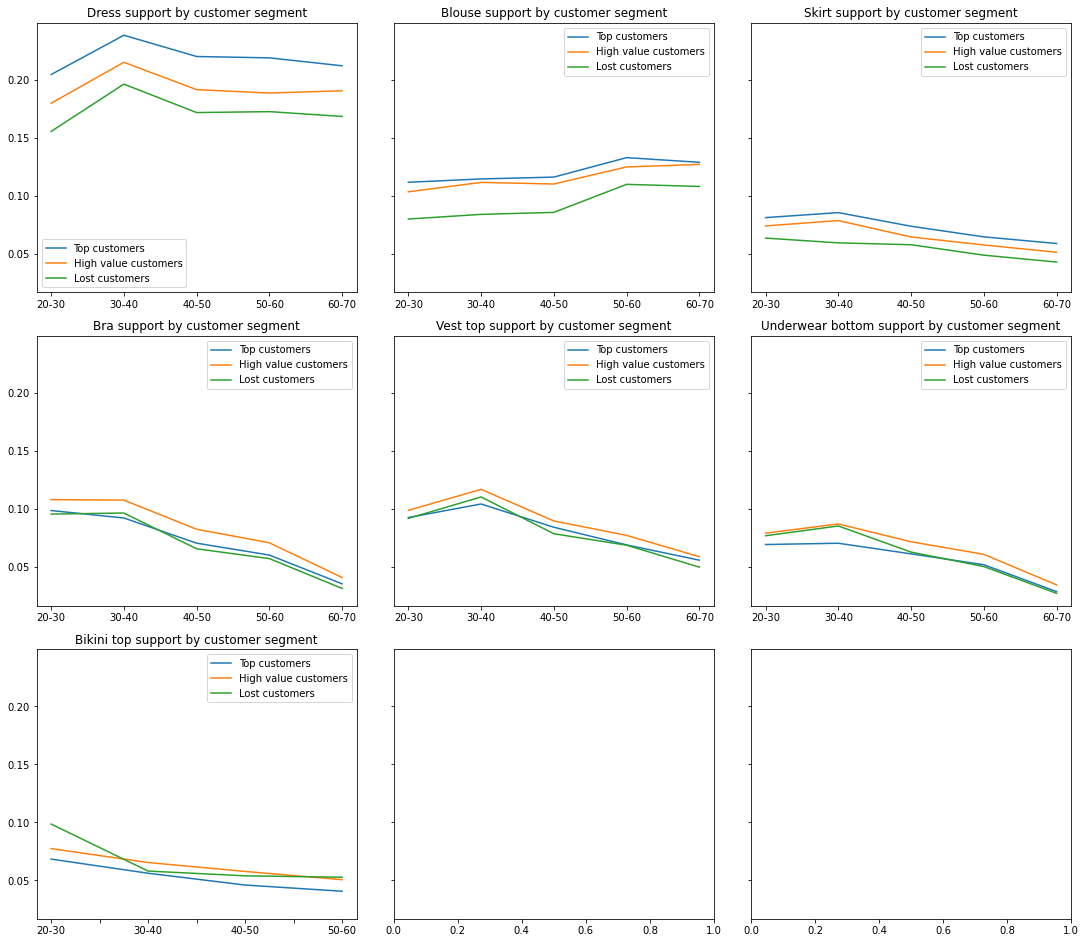

In [116]:
fig,axs = plt.subplots(3,3,figsize=(15.4,13.2),sharey=True)

for ax,item in zip(axs.flatten(),interesting_items):
    dic[item].plot(title=f'{item} support by customer segment', ax=ax)
plt.tight_layout()

In [ ]:
# Conclusions:
# 1)
# By analyzing the trends, it can be seen that items like dresses, blouses and skirts are more popular the higher the value of 
# the segment group, making it the preferent choice for high-valued customers. The popularity for dresses and blouses remains 
# high for different age ranges. These are kind of items very related to the fashion trends and this shows that a strong brand 
# engagement is created for these items.

# 2)
# Items like the bras, the vest tops, underwear bottom, skirts and bikini tops show a decreasing popularity after the 40 years 
# old.

# 3)
# Bikini tops are most popular among the lower-valued customers, signaling this type of item is a non brand-engaging one bought 
# specially by young customers wanting to try out something different casually.